# **Question 1**

Consider a machine learning model where the loss function is given by $L(x,y) = e^{x^2+y^2} + \cos(xy)$. Your task
 is to;

(a) Find the partial derivatives ∂L/
 ∂x and ∂L/
 ∂y

In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from mpl_toolkits.mplot3d import Axes3D
import cv2
from scipy.fft import fft2, fftshift, ifft2, dct, idct
from scipy.ndimage import gaussian_filter

In [13]:
# Define the variables
x, y = sp.symbols('x y')

# loss function L(x, y)
L = sp.exp(x**2 + y**2) + sp.cos(x * y)

# Compute the partial derivatives
partial_L_x = sp.diff(L, x)  # ∂L/∂x
partial_L_y = sp.diff(L, y)  # ∂L/∂y

# Display the partial derivatives
display(sp.Eq(sp.Symbol('∂L/∂x'), partial_L_x))
display(sp.Eq(sp.Symbol('∂L/∂y'), partial_L_y))


Eq(∂L/∂x, 2*x*exp(x**2 + y**2) - y*sin(x*y))

Eq(∂L/∂y, -x*sin(x*y) + 2*y*exp(x**2 + y**2))

(b) Write a Python function that computes the gradient vector for a given input (x,y).

In [15]:
def compute_gradient(x_val, y_val):
    # Substitute the input values into the gradient components
    gradient_x = partial_L_x.subs({x: x_val, y: y_val})
    gradient_y = partial_L_y.subs({x: x_val, y: y_val})
    # Return the gradient vector as a tuple
    return float(gradient_x), float(gradient_y)

# Example usage
x_val = 1  # Example value for x
y_val = 1  # Example value for y
gradient = compute_gradient(x_val, y_val)

print(f"Gradient vector at point ({x_val}, {y_val}): {gradient}")

Gradient vector at point (1, 1): (13.936641213053404, 13.936641213053404)


(c)  Use Matplotlib to visualize the loss function as a 3D surface plot over the range x,y ∈ [−2,2].

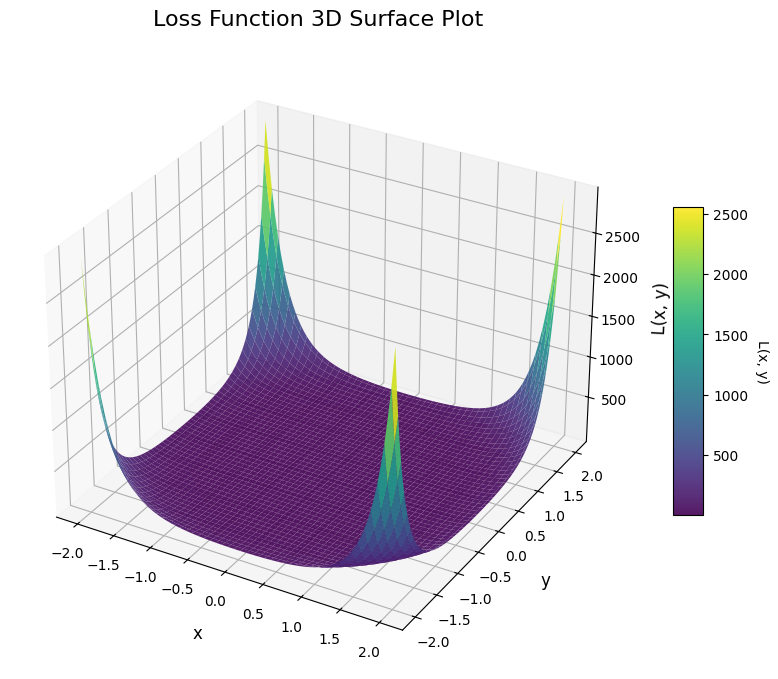

In [16]:
# Define the loss function
def loss_function(x, y):
    return np.exp(x**2 + y**2) + np.cos(x * y)

# Generate x and y values
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute the loss function values
Z = loss_function(X, Y)

# Create the 3D surface plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.9)

# Add a color bar
cbar = fig.colorbar(surf, shrink=0.5, aspect=10)
cbar.set_label('L(x, y)', rotation=270, labelpad=15)

# Add titles and axis labels
ax.set_title("Loss Function 3D Surface Plot", fontsize=16, pad=20)
ax.set_xlabel("x", fontsize=12, labelpad=10)
ax.set_ylabel("y", fontsize=12, labelpad=10)
ax.set_zlabel("L(x, y)", fontsize=12, labelpad=10)

# Customize tick sizes
ax.tick_params(axis='both', which='major', labelsize=10)

# Show the plot
plt.show()


(d) Discuss the significance of gradient vectors in model optimization, particularly in gradient descent
methods.

In [17]:
discussion = """
gradient vectors consists of two aspects; the direction and magnitude. The direction which shows
the steepest path while the magnitude shows the steepest ascent.

Gradient vectors are used for model optimization. This is done by identifying the gradient vector
of the loss function and by moving in the opposite direction in order to minimize the loss funtion.
This process is called gradient descent.

In machine learning, such higher dimentional gradient vectors are used for optimizing the model
performance by minimizing the errors, scalability and for iterative improvements.

Gradients are computed during backpropagation to adjust weights in neural networks.
"""
print(discussion)


gradient vectors consists of two aspects; the direction and magnitude. The direction which shows
the steepest path while the magnitude shows the steepest ascent.

Gradient vectors are used for model optimization. This is done by identifying the gradient vector
of the loss function and by moving in the opposite direction in order to minimize the loss funtion.
This process is called gradient descent.

In machine learning, such higher dimentional gradient vectors are used for optimizing the model 
performance by minimizing the errors.
Gradients are computed during backpropagation to adjust weights in neural networks.



# **Question 2**


The amplitude of a signal $A(t)$ can be modeled by the function $A(t) = 2t^2e^{-t}$ over the interval $t \in [0,4]$.

(a)
Use the Python library SymPy to compute the definite integral
$\int_{0}^{4} 2t^2e^{-t} dt$

In [18]:
t = sp.symbols('t')
A_t = 2 * t**2 * sp.exp(-t)
definite_integral = sp.integrate(A_t, (t, 0, 4))
integral_value = float(definite_integral)
print(f"The definite integral of A(t) from 0 to 4 is: {integral_value:.4f}")

The definite integral of A(t) from 0 to 4 is: 3.0476


(b) Plot the function A(t) using Matplotlib and annotate the graph with the area under the curve
corresponding to the integral.

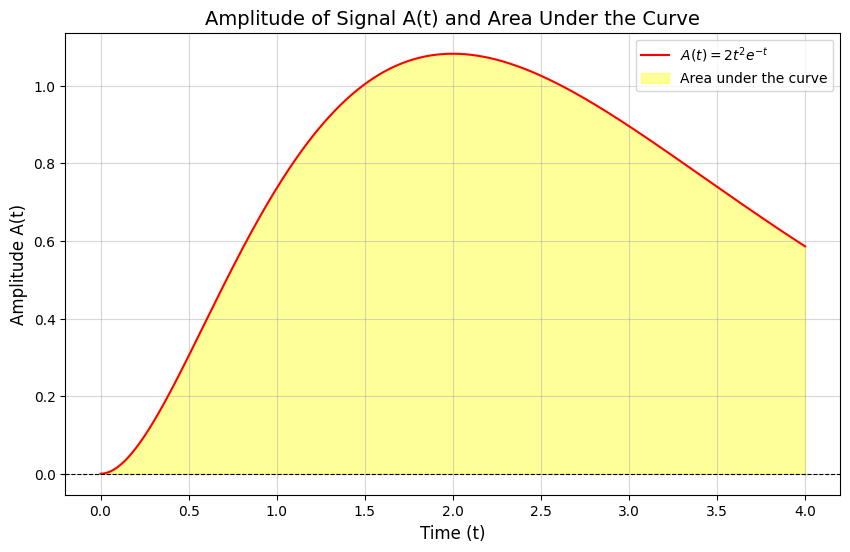

In [22]:
t_vals = np.linspace(0, 4, 500)  # Generate time values
A_vals = 2 * t_vals**2 * np.exp(-t_vals)  # Compute A(t) values

plt.figure(figsize=(10, 6))
plt.plot(t_vals, A_vals, label=r"$A(t) = 2t^2 e^{-t}$", color='red')
plt.fill_between(t_vals, A_vals, color='yellow', alpha=0.4, label="Area under the curve")
plt.title("Amplitude of Signal A(t) and Area Under the Curve", fontsize=14)
plt.xlabel("Time (t)", fontsize=12)
plt.ylabel("Amplitude A(t)", fontsize=12)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

(c) Interpret the meaning of the computed integral in the context of signal energy.

In [23]:
interpretation = """
The computed integral represents the total energy of the signal over the interval [0, 4].
In signal processing, the energy of a signal is defined as the integral of the square
of its amplitude over a specific time interval.

When the integral or energy increases, it means that the signal has a higher amplitude
or that its variations over time are more intense. On the other hand, it being low means
that the signal has a lower amplitude or that its variations are less pronounced and hence
more vulnerable to noise.

Here, the integral quantifies the cumulative contribution of the signal's amplitude to
its energy, which is useful in analyzing its behavior and power characteristics.
"""
print(interpretation)


The computed integral represents the total energy of the signal over the interval [0, 4].
In signal processing, the energy of a signal is defined as the integral of the square
of its amplitude over a specific time interval. 

When the integral or energy increases, it means that the signal has a higher amplitude
or that its variations over time are more intense. On the other hand, it being low means 
that the signal has a lower amplitude or that its variations are less pronounced and hence 
more vulnerable to noise. 

Here, the integral quantifies the cumulative contribution of the signal's amplitude to 
its energy, which is useful in analyzing its behavior and power characteristics.



# **Question 3**


The function $f(x) = \ln(1 + x)$ can be approximated by the series:
$$f(x) = x - \frac{x^2}{2} + \frac{x^3}{3} - \frac{x^4}{4} + \dots$$

(a) Implement a Python script that uses the first 10 terms of this series to approximate ln(1 + x) for
 x ∈[−1,1]

In [24]:
def approximate_ln1x(x, terms=10):
    approximation = 0
    for n in range(1, terms + 1):
        approximation += ((-1)**(n+1)) * (x**n) / n
    return approximation

# Generate x values in the range [-1, 1]
x_values = np.linspace(-1, 1, 500)

# Compute approximations and actual values
approximations = [approximate_ln1x(x, terms=10) for x in x_values]
actual_values = np.log(1 + x_values)

<ipython-input-24-8fe5e78f3b49>:12: RuntimeWarning: divide by zero encountered in log
  actual_values = np.log(1 + x_values)


(b) Plot the approximation and the actual function ln(1 + x) on the same graph for comparison.

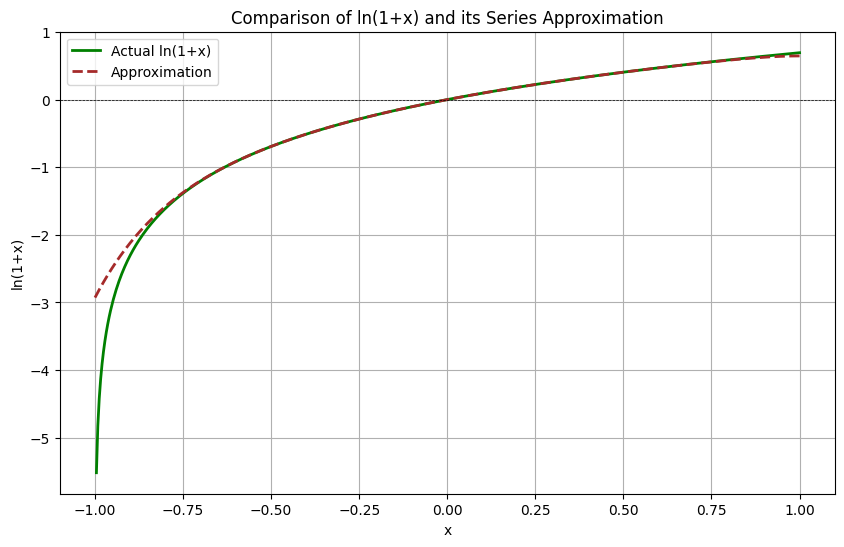

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(x_values, actual_values, label='Actual ln(1+x)', color='green', linewidth=2)
plt.plot(x_values, approximations, label='Approximation', linestyle='--', color='brown', linewidth=2)
plt.title('Comparison of ln(1+x) and its Series Approximation')
plt.xlabel('x')
plt.ylabel('ln(1+x)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


(c) Analyze the convergence behavior of the series, particularly focusing on the error for larger values of x.

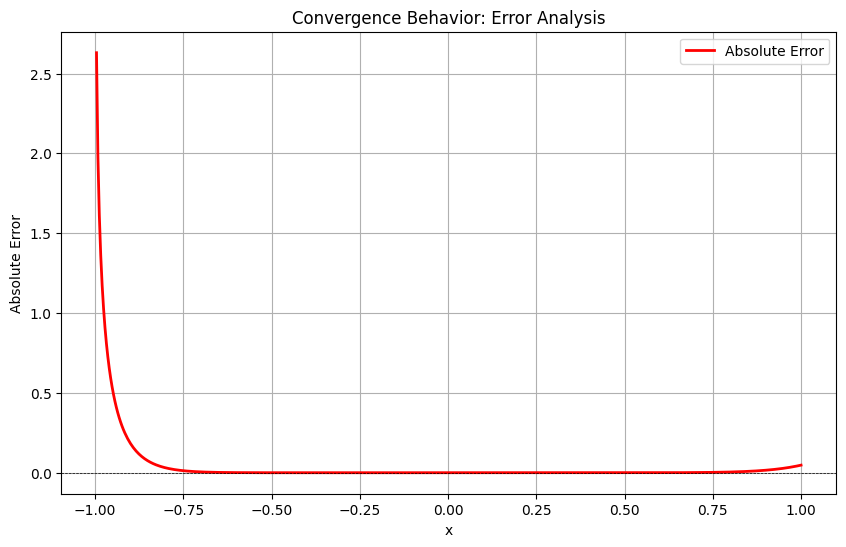

In [32]:
errors = np.abs(np.array(approximations) - actual_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, errors, label='Absolute Error', color='red', linewidth=2)
plt.title('Convergence Behavior: Error Analysis')
plt.xlabel('x')
plt.ylabel('Absolute Error')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

# **Question 4**


A noisy signal $s(t) = \sin(2\pi t) + 0.5\sin(10\pi t) + 0.3\sin(50\pi t)$ is sampled over the interval $t \in [0, 1]$ with 500 sample points.

In [33]:
# Define the signal parameters
sampling_rate = 500  # Samples per second
duration = 1  # Seconds
t = np.linspace(0, duration, sampling_rate, endpoint=False)  # Time vector

# Original signal: s(t) = sin(2πt) + 0.5sin(10πt) + 0.3sin(50πt)
signal = np.sin(2 * np.pi * t) + 0.5 * np.sin(10 * np.pi * t) + 0.3 * np.sin(50 * np.pi * t)


(a)  Perform a Fourier Transform on this signal using NumPy and plot the frequency spectrum.

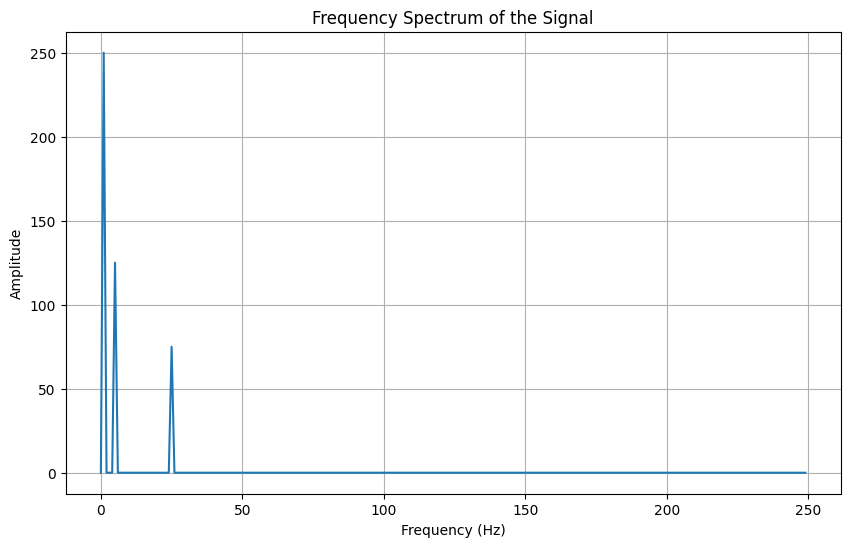

In [34]:
frequencies = np.fft.fftfreq(sampling_rate, 1/sampling_rate)  # Frequency components
fft_values = np.fft.fft(signal)  # Fourier transform

# Plot frequency spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:sampling_rate // 2], np.abs(fft_values)[:sampling_rate // 2])
plt.title('Frequency Spectrum of the Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

(b) Design and apply a low-pass filter to remove frequencies above 20 Hz, then plot the filtered signal.

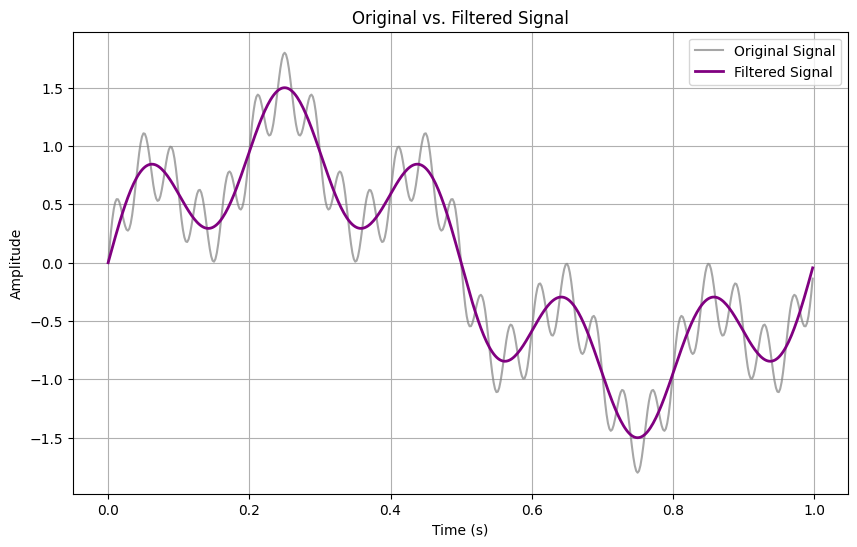

In [38]:
fft_filtered = fft_values.copy()
fft_filtered[np.abs(frequencies) > 20] = 0  # Remove frequencies above 20 Hz

# Inverse Fourier Transform to get the filtered signal
filtered_signal = np.fft.ifft(fft_filtered).real

# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Original Signal', color='grey', alpha=0.7)
plt.plot(t, filtered_signal, label='Filtered Signal', color='purple', linewidth=2)
plt.title('Original vs. Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
# 4. Part (c) - Discussion
print("""
Filtering removes high-frequency components, which are often associated with noise or unwanted details.
By applying the low-pass filter (cutoff = 20 Hz), we retain the dominant low-frequency components
(sin(2πt) and 0.5sin(10πt)) while removing the high-frequency noise (0.3sin(50πt)).

Applications in real-world scenarios includes Audio processing in which removing background noise from
recordings happen. Image processing too is an example, especially in Smoothing out pixel-level noise in images.
Data preprocessing where removing noise from time-series data in finance or IoT is required and application
in terms of Biomedical signals in which Filtering noise from ECG or EEG data is done can also be taken as examples.
""")


Filtering removes high-frequency components, which are often associated with noise or unwanted details.
By applying the low-pass filter (cutoff = 20 Hz), we retain the dominant low-frequency components
(sin(2πt) and 0.5sin(10πt)) while removing the high-frequency noise (0.3sin(50πt)).

Applications in real-world scenarios includes Audio processing in which removing background noise from 
recordings happen. Image processing too is an example, especially in Smoothing out pixel-level noise in images.
Data preprocessing where removing noise from time-series data in finance or IoT is required and application
in terms of Biomedical signals in which Filtering noise from ECG or EEG data is done can also be taken as examples. 



# **Question 5**

Consider the image provided in the coursework description on Moodle. Your task is to perform the following
operations using Python:

In [40]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


(a) Find the edges in the image using a 2D Fourier Transform. Visualize the resulting image with detected
edges.

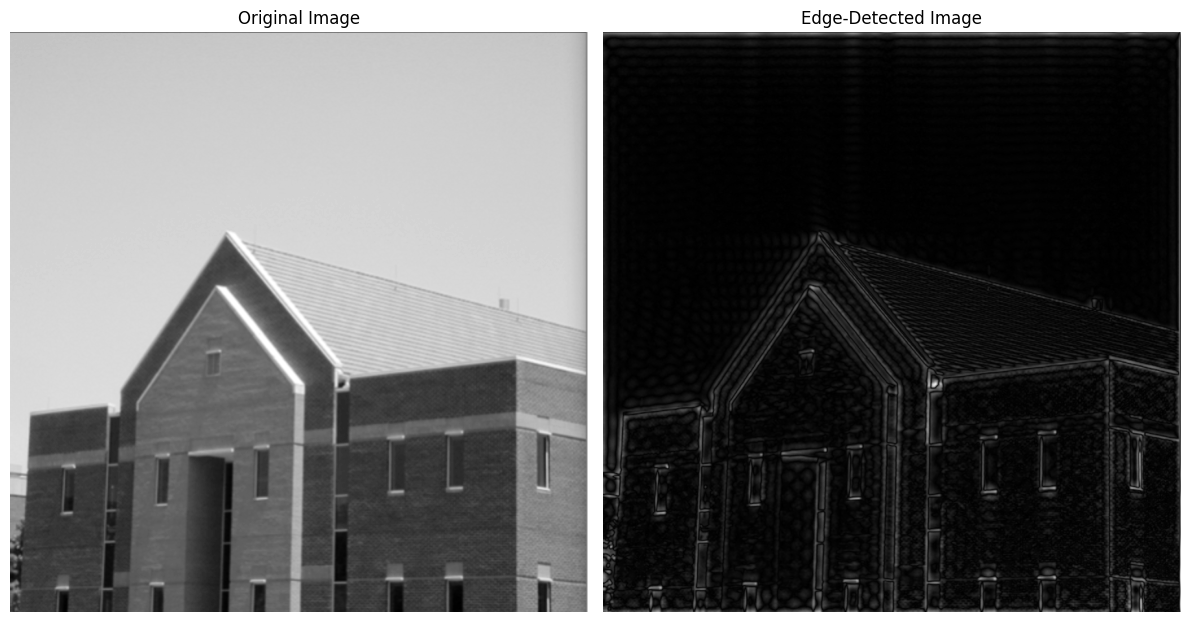

In [44]:
from numpy.fft import fft2, fftshift, ifftshift, ifft2  # Ensure ifftshift is imported

# Load the image in grayscale
image_path = '/content/drive/My Drive/Image (2).png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    raise FileNotFoundError(f"Image not found at {image_path}. Please check the file path.")

# Perform 2D Fourier Transform
f_transform = fft2(image)  # Apply Fourier Transform
f_transform_shifted = fftshift(f_transform)  # Shift zero frequency component to the center
magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)  # Compute the magnitude spectrum

# Create a high-pass filter to focus on edges (remove low frequencies)
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2  # Center of the image
mask = np.ones((rows, cols), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 0  # Suppress low frequencies in the center

# Apply the high-pass filter to the shifted Fourier transform
f_transform_filtered = f_transform_shifted * mask

# Inverse Fourier Transform to reconstruct the edge-detected image
f_transform_unshifted = ifftshift(f_transform_filtered)  # Shift back
filtered_image = np.abs(ifft2(f_transform_unshifted))  # Reconstruct the image

# Visualize the results
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Reconstructed edges (after filtering)
plt.subplot(1, 2, 2)
plt.title("Edge-Detected Image")
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

(b) Apply a Gaussian blur to the original image using a 2D Fourier Transform and compare it to a standard
Gaussian blur.

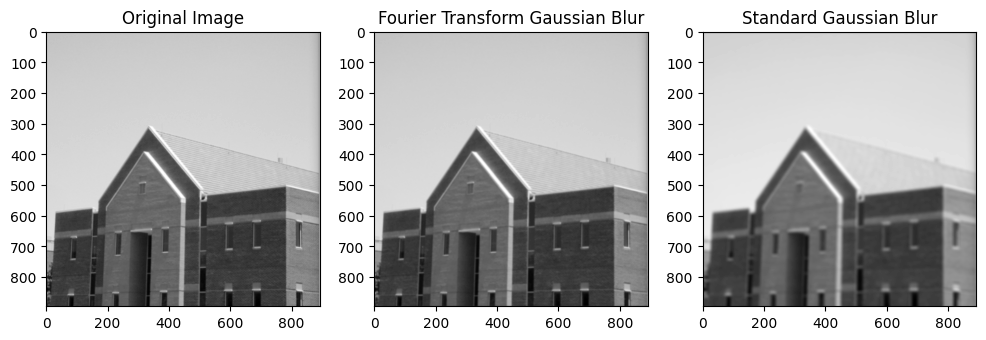

In [45]:
# Gaussian blur using Fourier Transform
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2

# Create a Gaussian filter in frequency domain
x = np.linspace(-0.5, 0.5, cols)
y = np.linspace(-0.5, 0.5, rows)
x, y = np.meshgrid(x, y)
gaussian_filter = np.exp(-((x**2 + y**2) * 25))

# Apply Gaussian filter in the frequency domain
f_transform_filtered = f_transform_shifted * gaussian_filter
blurred_image_fft = np.abs(ifft2(fftshift(f_transform_filtered)))

# Standard Gaussian blur using OpenCV
blurred_image_cv = cv2.GaussianBlur(image, (15, 15), 5)

# Visualize the results
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.subplot(1, 3, 2)
plt.title("Fourier Transform Gaussian Blur")
plt.imshow(blurred_image_fft, cmap='gray')
plt.subplot(1, 3, 3)
plt.title("Standard Gaussian Blur")
plt.imshow(blurred_image_cv, cmap='gray')
plt.show()


(c) Apply a Discrete Cosine Transform (DCT) to the original image. Then, scale the image down to 240px
× 240px using the DCT. Display the scaled image and compare it to the original.

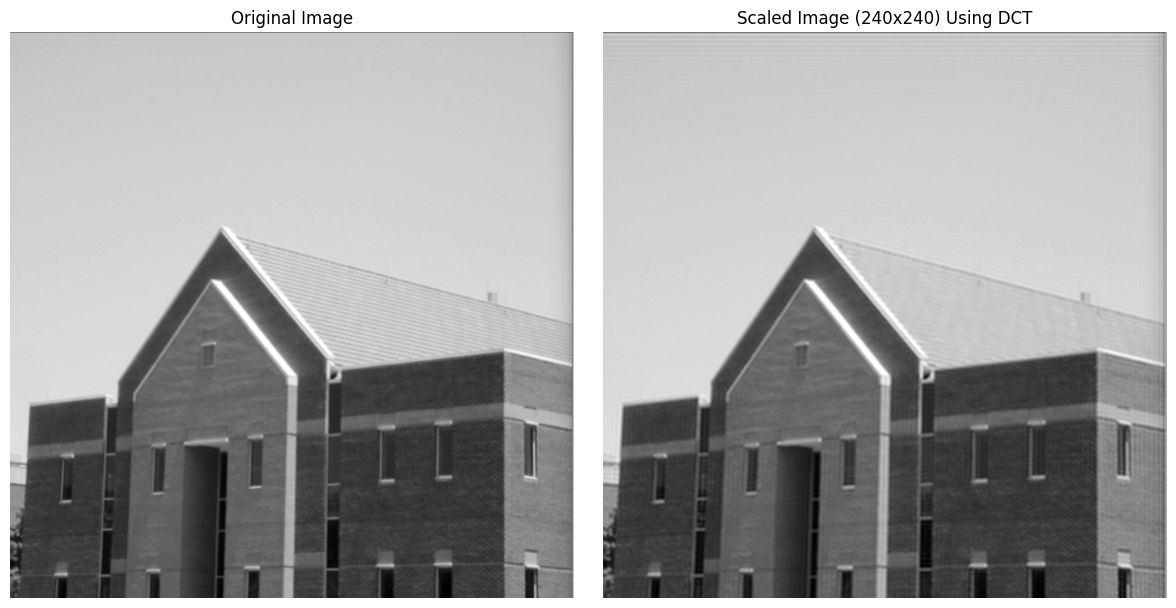

In [49]:
from scipy.fftpack import dct, idct

# Apply 2D DCT to the image
dct_image = dct(dct(image.T, norm='ortho').T, norm='ortho')

# Zero out higher-frequency coefficients for scaling
scaled_dct = dct_image.copy()
scaled_dct[240:, :] = 0  # Retain only low-frequency components in rows
scaled_dct[:, 240:] = 0  # Retain only low-frequency components in columns

# Reconstruct the image using Inverse DCT
scaled_image = idct(idct(scaled_dct.T, norm='ortho').T, norm='ortho')

# Normalize the reconstructed image to the 0-255 range
scaled_image = np.clip(scaled_image, 0, 255)  # Clip values to valid range
scaled_image = scaled_image.astype(np.uint8)  # Convert to 8-bit integers

# Resize the original image to 240x240 for comparison
original_resized = cv2.resize(image, (240, 240), interpolation=cv2.INTER_AREA)

# Visualize the original and scaled images
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Scaled Image Using DCT
plt.subplot(1, 2, 2)
plt.title("Scaled Image (240x240) Using DCT")
plt.imshow(scaled_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


(d) Reproduce and explain the common artifacts (ringing and blocking) that occur when an image is
 compressed using DCT. Provide visual examples of these artifacts.

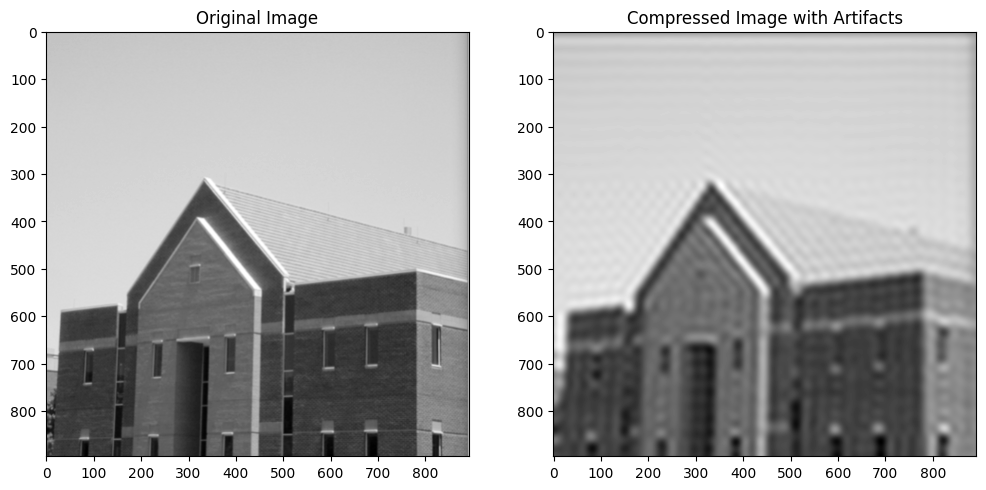


Compression using DCT introduces two main types of artifacts:
1. Ringing: Visible near sharp edges due to the truncation of high-frequency coefficients.
2. Blocking: Visible as blocky patterns in smooth regions due to coarse quantization.

These artifacts occur because DCT operates on small blocks (e.g., 8x8), and compression reduces
detail in each block independently, leading to discontinuities at block boundaries.



In [53]:
from scipy.fftpack import dct, idct
import numpy as np
import matplotlib.pyplot as plt

# Apply 2D DCT to the image
dct_image = dct(dct(image.T, norm='ortho').T, norm='ortho')

# Introduce compression artifacts by zeroing out more DCT coefficients
compressed_dct = dct_image.copy()
compressed_dct[60:, :] = 0  # Zero out rows below index 60
compressed_dct[:, 60:] = 0  # Zero out columns to the right of index 60

# Reconstruct the image with artifacts
compressed_image = idct(idct(compressed_dct.T, norm='ortho').T, norm='ortho')

# Visualize artifacts
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')  # Corrected imshow call
plt.subplot(1, 2, 2)
plt.title("Compressed Image with Artifacts")
plt.imshow(compressed_image, cmap='gray')  # Corrected imshow call
plt.show()

# Explain artifacts
print("""
Compression using DCT introduces two main types of artifacts:
1. Ringing: Visible near sharp edges due to the truncation of high-frequency coefficients.
2. Blocking: Visible as blocky patterns in smooth regions due to coarse quantization.

These artifacts occur because DCT operates on small blocks (e.g., 8x8), and compression reduces
detail in each block independently, leading to discontinuities at block boundaries.
""")
